In [35]:
rawText = """

Stress is a natural response of the body to external pressures, challenges, or threats, which can trigger a variety of physical, mental, and emotional reactions. In small doses, stress can be beneficial, helping individuals stay alert, focused, and motivated to overcome challenges. This type of stress is often referred to as "eustress" and can enhance performance, increase productivity, and help individuals meet deadlines or achieve goals. However, when stress becomes chronic or excessive, it can have negative effects on both physical and mental health. Chronic stress is often called "distress" and can lead to a range of serious health issues, including heart disease, high blood pressure, diabetes, anxiety, depression, and a weakened immune system.

The body’s stress response is governed by the autonomic nervous system and the release of stress hormones such as adrenaline and cortisol. When a person perceives a threat, the body enters a “fight-or-flight” mode, preparing the body to either confront or flee from the danger. This results in increased heart rate, rapid breathing, muscle tension, and heightened awareness. These physical changes are adaptive in situations where immediate action is required, such as when faced with a dangerous predator or during a stressful work deadline. However, when stress is prolonged and the body is continuously exposed to these physiological changes, it can have detrimental effects on health.

One of the most noticeable effects of stress is its impact on mental health. Chronic stress can lead to feelings of anxiety, irritability, and emotional exhaustion. It may also contribute to mood disorders such as depression and post-traumatic stress disorder (PTSD). When stress levels are high, individuals may have difficulty concentrating, making decisions, or remembering important tasks. The constant state of alertness can impair cognitive function, making it harder to think clearly and logically. Over time, this can reduce productivity and negatively affect personal relationships, as individuals may become withdrawn or more prone to conflict.

Physically, stress can cause a variety of symptoms. Common physical manifestations of stress include headaches, digestive issues, muscle tension, and sleep disturbances. People under chronic stress are more likely to experience problems with their cardiovascular system, such as high blood pressure or heart disease. Stress has also been linked to digestive problems like irritable bowel syndrome (IBS) or acid reflux, as the digestive system becomes disrupted during periods of high stress. Moreover, individuals may resort to unhealthy coping mechanisms, such as overeating, smoking, or excessive alcohol consumption, which can further exacerbate the negative effects of stress.

In addition to its physical and mental toll, stress can have an impact on a person’s social life. Chronic stress may lead to withdrawal from social interactions, as individuals may feel overwhelmed or unable to engage in conversations or activities. Over time, this isolation can deepen feelings of loneliness and contribute to the worsening of mental health issues. Relationships with friends, family, and colleagues may suffer as stress affects a person’s ability to communicate and empathize effectively.

Managing stress is crucial for maintaining both physical and mental well-being. Various techniques and strategies can help alleviate stress and prevent its negative consequences. Regular physical activity, such as walking, yoga, or swimming, is one of the most effective ways to reduce stress. Exercise promotes the release of endorphins, which are natural mood boosters that help counteract the effects of stress. Practicing mindfulness and meditation can also be beneficial in managing stress. These practices help individuals stay present in the moment, calm their minds, and regulate their emotional responses. Additionally, maintaining a healthy lifestyle, which includes getting adequate sleep, eating a balanced diet, and staying hydrated, is essential for managing stress effectively.

In conclusion, stress is a complex and multifaceted experience that affects individuals in different ways. While short-term stress can be motivating and energizing, chronic stress can have serious consequences for both physical and mental health. Recognizing the signs of stress and adopting healthy coping mechanisms are essential for managing stress and reducing its impact. By engaging in physical activity, practicing relaxation techniques, and maintaining a balanced lifestyle, individuals can mitigate the harmful effects of stress and improve their overall well-being. Ultimately, stress management is about finding a balance that allows individuals to cope with life’s challenges without compromising their health or happiness.

Mumbai, dadar, virar, pune

ambani, elon musk, tesla , shaun, atharva, Ahmedabad
"""
 

In [36]:
with open('locationWords.txt', 'r') as file:
    extracLocation = [line.strip() for line in file.readlines()]

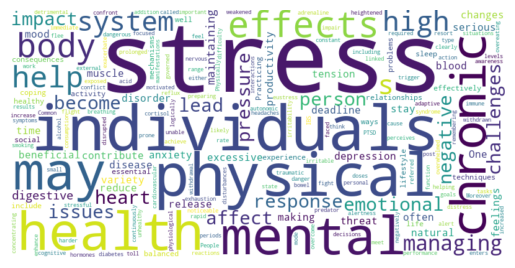

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_cloud(text: str):
    """
    Generates and displays a word cloud from the given text.
    """
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

generate_word_cloud(rawText)

In [3]:
from collections import Counter
import re

def top_10_frequent_words(text: str):
    """
    Returns the top 10 most frequent words and their word counts.
    """
    words = re.findall(r'\w+', text.lower())
    word_counts = Counter(words)
    return word_counts.most_common(10)

top_10_frequent_words(rawText)

[('stress', 34),
 ('and', 33),
 ('of', 20),
 ('to', 20),
 ('the', 19),
 ('can', 18),
 ('a', 17),
 ('or', 15),
 ('is', 13),
 ('as', 11)]

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

def top_10_topics(texts: list, n_topics: int = 10):
    """
    Perform topic modeling using LDA and return the top 10 topics with their words.
    """
    # Ensure texts is a list, and rawText should be inside a list
    if isinstance(texts, str):
        texts = [texts]
        
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(texts)
    
    lda = LatentDirichletAllocation(n_components=n_topics)
    lda.fit(X)
    
    words = vectorizer.get_feature_names_out()
    topics = []
    
    for topic_idx, topic in enumerate(lda.components_):
        topic_words = [words[i] for i in topic.argsort()[:-11:-1]]
        topics.append(f"Topic {topic_idx + 1}: " + ", ".join(topic_words))
    
    return topics

# Example usage
topics = top_10_topics([rawText])  # Pass rawText as a list
print(topics)


['Topic 1: ability, yoga, worsening, work, withdrawn, withdrawal, weakened, achieve, walking, virar', 'Topic 2: ability, yoga, worsening, work, withdrawn, withdrawal, weakened, achieve, walking, virar', 'Topic 3: ability, yoga, worsening, work, withdrawn, withdrawal, weakened, achieve, walking, virar', 'Topic 4: ability, yoga, worsening, work, withdrawn, withdrawal, weakened, achieve, walking, virar', 'Topic 5: ability, yoga, worsening, work, withdrawn, withdrawal, weakened, achieve, walking, virar', 'Topic 6: stress, individuals, physical, mental, health, effects, chronic, body, managing, high', 'Topic 7: ability, yoga, worsening, work, withdrawn, withdrawal, weakened, achieve, walking, virar', 'Topic 8: ability, yoga, worsening, work, withdrawn, withdrawal, weakened, achieve, walking, virar', 'Topic 9: ability, yoga, worsening, work, withdrawn, withdrawal, weakened, achieve, walking, virar', 'Topic 10: ability, yoga, worsening, work, withdrawn, withdrawal, weakened, achieve, walking,

In [5]:
def word_frequency(text: str):
    """
    Returns a dictionary of all words and their frequency, sorted by frequency (high to low).
    """
    words = re.findall(r'\w+', text.lower())
    word_counts = Counter(words)
    return dict(word_counts.most_common())

word_frequency(rawText)

{'stress': 34,
 'and': 33,
 'of': 20,
 'to': 20,
 'the': 19,
 'can': 18,
 'a': 17,
 'or': 15,
 'is': 13,
 'as': 11,
 'in': 10,
 'individuals': 10,
 'physical': 9,
 'mental': 7,
 'health': 7,
 'may': 7,
 'chronic': 6,
 'effects': 6,
 'such': 6,
 'body': 5,
 'when': 5,
 'have': 5,
 'are': 5,
 'their': 5,
 'which': 4,
 'this': 4,
 'help': 4,
 'it': 4,
 'on': 4,
 'high': 4,
 'system': 4,
 's': 4,
 'with': 4,
 'its': 4,
 'managing': 4,
 'for': 4,
 'challenges': 3,
 'emotional': 3,
 'be': 3,
 'negative': 3,
 'both': 3,
 'lead': 3,
 'issues': 3,
 'heart': 3,
 'person': 3,
 'these': 3,
 'impact': 3,
 'also': 3,
 'digestive': 3,
 'maintaining': 3,
 'that': 3,
 'natural': 2,
 'response': 2,
 'variety': 2,
 'beneficial': 2,
 'stay': 2,
 'often': 2,
 'productivity': 2,
 'however': 2,
 'becomes': 2,
 'excessive': 2,
 'serious': 2,
 'disease': 2,
 'blood': 2,
 'pressure': 2,
 'anxiety': 2,
 'depression': 2,
 'by': 2,
 'release': 2,
 'from': 2,
 'muscle': 2,
 'tension': 2,
 'changes': 2,
 'during': 2

In [42]:
import spacy

# Open the file and read the lines into a list
with open('brandWords.txt', 'r') as file:
    brand_words = [line.strip() for line in file.readlines()]

def extract_brands(text: str):
    """
    python -m spacy download en_core_web_sm
    
    Extracts a list of brand names (organizations) from the text using NER.
    """
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    brands = [ent.text for ent in doc.ents if ent.label_ == 'ORG']
    return list(set(brands))  # Remove duplicates



def find_brand_words_in_text(text, brand_words):
    # Tokenize the text into words and make it case-insensitive
    words_in_text = [word.lower() for word in text.split()]
    
    # Find brand words that are present in the text
    found_brand_words = [word for word in brand_words if word.lower() in words_in_text]
    
    return found_brand_words

# Example usage:
brand_words_found = find_brand_words_in_text(rawText, brand_words)
brand_words_found.extend(extract_brands(rawText))
brand_words_found

['More', 'Range', 'State', 'IBS']

In [32]:
def extract_locations(text: str, extra_locations=None):
    """
    Extracts a list of location names (places, countries, cities) from the text using NER.
    Adds extra locations from the provided list if they are found in the text.
    
    :param text: The input text to extract locations from.
    :param extra_locations: A list of additional location names to consider.
    :return: A list of unique location names (locations from NER + extra locations found in the text).
    """
    if extra_locations is None:
        extra_locations = []
    
    # Initialize spaCy model
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    
    # Extract locations using NER
    locations = [ent.text for ent in doc.ents if ent.label_ == 'GPE']
    
    # Case-insensitive check for matching words from extra_locations
    for loc in extra_locations:
        if any(loc.lower() in word.lower() for word in text.split()):
            locations.append(loc)
    
    return list(set(locations))  # Remove duplicates and return unique locations

print(extract_locations(rawText, extracLocation))

['Lar', 'Mumbai', 'Ron', 'Una', 'Rau', 'Pen', 'Pune', 'Tura', 'Mul', 'Ahmedabad']


In [29]:
def extract_persons(text: str):
    """
    Extracts a list of well-known persons' names from the text using NER.
    """
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    persons = [ent.text for ent in doc.ents if ent.label_ == 'PERSON']
    return list(set(persons))  # Remove duplicates

extract_persons(rawText)

['elon musk']

In [19]:
from textblob import TextBlob

def analyze_sentiment(text: str):
    """
    Analyzes the sentiment of the text and returns positive, negative, or neutral sentiment.
    """
    sentiment_score = TextBlob(text).sentiment.polarity
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

analyze_sentiment(rawText)

'Positive'

In [15]:
def extract_actions(text: str):
    """
    Extracts a list of verbs (actions) from the text using NER and POS tagging.
    """
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    actions = [token.text for token in doc if token.pos_ == 'VERB']
    return list(set(actions))  # Remove duplicates

extract_actions(rawText)

['motivating',
 'promotes',
 'eating',
 'think',
 'Managing',
 'counteract',
 'motivated',
 'achieve',
 'Recognizing',
 'helping',
 'faced',
 'remembering',
 'exposed',
 'Practicing',
 'concentrating',
 'prevent',
 'enhance',
 'trigger',
 'adopting',
 'affects',
 'meet',
 'resort',
 'perceives',
 'reducing',
 'engaging',
 'required',
 'contribute',
 'overcome',
 'improve',
 'governed',
 'affect',
 'reduce',
 'called',
 'prolonged',
 'getting',
 'focused',
 'finding',
 'coping',
 'empathize',
 'referred',
 'experience',
 'deepen',
 'heightened',
 'increase',
 'enters',
 'mitigate',
 'maintaining',
 'practicing',
 'making',
 'staying',
 'communicate',
 'feel',
 'lead',
 'energizing',
 'managing',
 'include',
 'help',
 'flee',
 'compromising',
 'preparing',
 'alleviate',
 'increased',
 'stay',
 'suffer',
 'become',
 'withdrawn',
 'cause',
 'disrupted',
 'impair',
 'includes',
 'including',
 'exacerbate',
 'calm',
 'cope',
 'allows',
 'linked',
 'engage',
 'regulate',
 'becomes',
 'have']

In [18]:
def matching_keywords(text: str, keywords: list):
    """
    Returns a list of keywords from the given list that are found in the text.
    """
    words = re.findall(r'\w+', text.lower())
    matching = [keyword for keyword in keywords if keyword.lower() in words]
    return matching

keywords = ["fox", "apple", "dog", "elon", "musk", "mumbai", "atharva", "shaun"]
matching_keywords(rawText, keywords)

['elon', 'musk', 'mumbai', 'atharva', 'shaun']

In [37]:
# Open the file and read the lines into a list
with open('negativeWords.txt', 'r') as file:
    negative_words = [line.strip() for line in file.readlines()]

def find_negative_words_in_text(text, negative_words):
    # Tokenize the text into words and make it case-insensitive
    words_in_text = [word.lower() for word in text.split()]
    
    # Find negative words that are present in the text
    found_negative_words = [word for word in negative_words if word.lower() in words_in_text]
    
    return found_negative_words

negative_words_found = find_negative_words_in_text(rawText, negative_words)
print(negative_words_found)


['chronic', 'complex', 'confront', 'dangerous', 'depression', 'detrimental', 'difficulty', 'disorder', 'exacerbate', 'excessive', 'flee', 'harmful', 'impair', 'irritable', 'isolation', 'loneliness', 'negative', 'nervous', 'overwhelmed', 'problems', 'stress', 'stressful', 'suffer', 'syndrome', 'unable', 'unhealthy', 'worsening']


In [38]:
# Open the file and read the lines into a list
with open('positiveWords.txt', 'r') as file:
    positive_words = [line.strip() for line in file.readlines()]

def find_positive_words_in_text(text, positive_words):
    # Tokenize the text into words and make it case-insensitive
    words_in_text = [word.lower() for word in text.split()]
    
    # Find positive words that are present in the text
    found_positive_words = [word for word in positive_words if word.lower() in words_in_text]
    
    return found_positive_words

positive_words_found = find_positive_words_in_text(rawText, positive_words)
print(positive_words_found)


['adaptive', 'adequate', 'balanced', 'beneficial', 'calm', 'clearly', 'effective', 'empathize', 'engaging', 'enhance', 'healthy', 'helping', 'important', 'improve', 'lead', 'like', 'motivated', 'rapid', 'variety', 'work']
